In [168]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib
plt.switch_backend('agg')
import os
import sys
import json
sys.path.append('../')
from utils import utils
from collections import defaultdict
from mpl_toolkits.axes_grid1 import AxesGrid

empirical_percents = [5, 1, 0.05]
sbs = ["0.01", "0.05"]
methods = ["tejaas_perm", "matrixeqtl"]
data_dir = "/cbscratch/franco/trans-eqtl/analysis/data"


tissue_file = "/usr/users/fsimone/trans-eqtl-pipeline/analysis/plots/tissues.txt"
tissues, descriptions = utils.read_tissues(tissue_file)

json_file = "../gtex_metadata.json"
with open(json_file) as instream:
    gtex_meta = json.load(instream)
my_colors = []
for d in descriptions:
    my_colors.append("#"+gtex_meta[d.replace(" ", "_")]["colorHex"])


# datasets = ['gtex-wb', 'gtex-sse', 'gtex-thy', 'gtex-aa', 'gtex-bca', 'gtex-bce']
datasets = ["gtex-"+t for t in tissues]
print("Working with:", datasets)
N = len(datasets)
matrix_dict = dict(zip(datasets, np.arange(N)))


def load_plot_data(auc_file, N, tissue_dict):
    auc_array = np.zeros((N,N)) # + 0.5
    if os.path.exists(auc_file):
        with open(auc_file) as instream:
            for line in instream:
                t1  = line.split("\t")[0]
                t2  = line.split("\t")[1]
                auc = np.float64(line.split("\t")[2])
                auc1k = np.float64(line.split("\t")[3].rstrip())
                i = matrix_dict.get(t1, None)
                j = matrix_dict.get(t2, None)
                if i is None:
                    print("Oops, {:s} is not in the data".format(t1))
                    continue
                if j is None:
                    print("Oops, {:s} is not in the data".format(t2))
                    continue
                if i > j:
                    i,j = j,i
                auc_array[i,j] = auc
            #auc_dict[method] = auc_array
            # auc_dict[mkey] = auc_array
    else:
        print("File not found", auc_file)
    return auc_array


Working with: ['gtex-ban', 'gtex-bca', 'gtex-bceh', 'gtex-bce', 'gtex-bco', 'gtex-bfr', 'gtex-bhi', 'gtex-bhy', 'gtex-bnu', 'gtex-bpu', 'gtex-pit', 'gtex-pro', 'gtex-si', 'gtex-spl', 'gtex-ut', 'gtex-va', 'gtex-ag', 'gtex-liv', 'gtex-tes', 'gtex-ov', 'gtex-fib', 'gtex-ms', 'gtex-haa', 'gtex-hlv', 'gtex-pan', 'gtex-wb', 'gtex-snse', 'gtex-sse', 'gtex-colt', 'gtex-cols', 'gtex-esog', 'gtex-esom', 'gtex-esomu', 'gtex-thy', 'gtex-ac', 'gtex-aa', 'gtex-at', 'gtex-sto', 'gtex-lu', 'gtex-av', 'gtex-as', 'gtex-br']


In [169]:
auc_dict = dict()
for ep in empirical_percents:
    for method in methods:
        if method == "tejaas_perm":
            for sb in sbs:
                method_sb = method + "_" + sb
                mkey = method_sb + "_ep" + str(ep)
                auc_dir = os.path.join(data_dir, method_sb, str(ep))
                auc_file = os.path.join(auc_dir, method_sb+".auc.txt")
                print(auc_file)
                auc_array = load_plot_data(auc_file, N, matrix_dict)
                auc_dict[mkey] = auc_array
        else:
            mkey = method + "_ep" + str(ep)
            auc_dir = os.path.join(data_dir, method, str(ep))
            auc_file = os.path.join(auc_dir, method+".auc.txt")    
            print(auc_file)
            auc_array = load_plot_data(auc_file, N, matrix_dict)
            auc_dict[mkey] = auc_array

mykeys = list(auc_dict.keys())
print("Loaded:", mykeys)

/cbscratch/franco/trans-eqtl/analysis/data/tejaas_perm_0.01/5/tejaas_perm_0.01.auc.txt
/cbscratch/franco/trans-eqtl/analysis/data/tejaas_perm_0.05/5/tejaas_perm_0.05.auc.txt
/cbscratch/franco/trans-eqtl/analysis/data/matrixeqtl/5/matrixeqtl.auc.txt
/cbscratch/franco/trans-eqtl/analysis/data/tejaas_perm_0.01/1/tejaas_perm_0.01.auc.txt
/cbscratch/franco/trans-eqtl/analysis/data/tejaas_perm_0.05/1/tejaas_perm_0.05.auc.txt
/cbscratch/franco/trans-eqtl/analysis/data/matrixeqtl/1/matrixeqtl.auc.txt
/cbscratch/franco/trans-eqtl/analysis/data/tejaas_perm_0.01/0.05/tejaas_perm_0.01.auc.txt
/cbscratch/franco/trans-eqtl/analysis/data/tejaas_perm_0.05/0.05/tejaas_perm_0.05.auc.txt
/cbscratch/franco/trans-eqtl/analysis/data/matrixeqtl/0.05/matrixeqtl.auc.txt
Loaded: ['tejaas_perm_0.01_ep5', 'tejaas_perm_0.05_ep5', 'matrixeqtl_ep5', 'tejaas_perm_0.01_ep1', 'tejaas_perm_0.05_ep1', 'matrixeqtl_ep1', 'tejaas_perm_0.01_ep0.05', 'tejaas_perm_0.05_ep0.05', 'matrixeqtl_ep0.05']


In [173]:
# possible methods ['tejaas_perm_0.01_ep5', 'tejaas_perm_0.05_ep5', 'matrixeqtl_ep5', 
#                   'tejaas_perm_0.01_ep1', 'tejaas_perm_0.05_ep1',
#                   'matrixeqtl_ep1', 'tejaas_perm_0.01_ep0.05', 'tejaas_perm_0.05_ep0.05', 'matrixeqtl_ep0.05']

m2 = "tejaas_perm_0.05_ep5"
m1 = "matrixeqtl_ep0.05"

outfile = m1+"_"+m2+"_crossval_map_"+str(ep)+".png"
method_array = auc_dict[m2].T + auc_dict[m1] + np.identity(N)
# method_array = auc_dict[m2].T + np.identity(N)
# method_array[range(N), range(N)] = (method_array.min() - 0.001)

method_array[range(N), range(N)] =  (0.5 - 0.001)
# method_array[np.triu_indices(method_array.shape[0])] = (0.5 - 0.001)


0.498771 0.96803


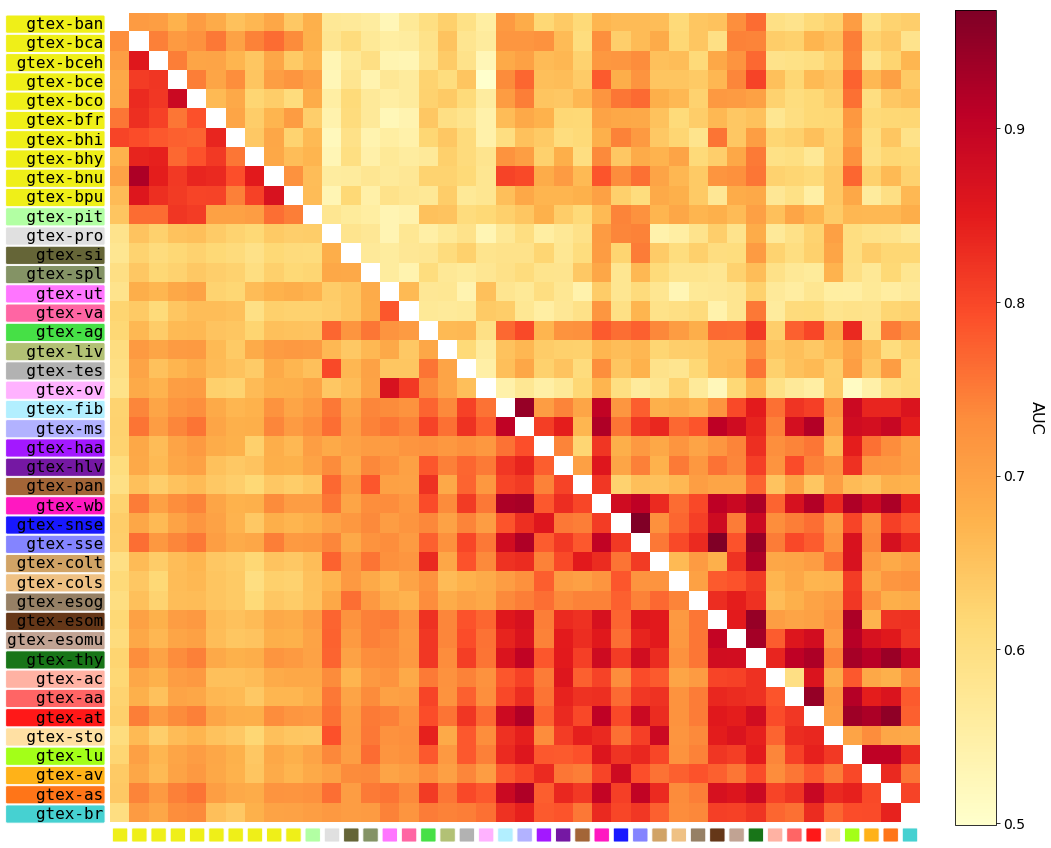

In [174]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111)

palette = "YlOrRd" # "RdBu_r"
# cmap = plt.cm.RdBu_r
cmap = plt.cm.YlOrRd
print(method_array.min(), method_array.max())
norm = plt.Normalize(method_array.min(), method_array.max())
rgba = cmap(norm(method_array))

## This sets diagonal to white
rgba[range(N), range(N), :3] = 1,1,1
## This sets upper or lower triangular matrix to whit
# for i in range(N):
#     for j in range(i):
#         rgba[j,i, :3] = 1,1,1
im = ax.imshow(rgba)

# Add the colorbar using a fake (not shown) image
im = ax.imshow(method_array, visible=False, cmap=palette)

# Create colorbar
#cbar = ax.figure.colorbar(im, ax=ax)

# plt.colorbar(im,fraction=0.046, pad=0.04)
cbar = ax.figure.colorbar(im,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel("AUC", rotation=-90, va="bottom", fontsize=16)

# delete axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y',which='both',left=False)
ax.tick_params(axis='x',which='both',bottom=False)

ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(N))
fontProperties = {'family':'monospace', 'fontsize':16}
ax.set_yticklabels([d.rjust(10) for d in datasets], fontdict=fontProperties, color="black")
ax.set_xticklabels(["   " for x in datasets], fontsize=16, color="black")
bbox = dict(boxstyle="round,pad=0.1", alpha=0.9, ec="white", fc="white")
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va="center", fontsize=12,
        rotation_mode="anchor", bbox=bbox)
plt.setp(ax.get_yticklabels(), bbox=bbox)


for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_backgroundcolor(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_backgroundcolor(tickcolor)

# bbox2 = dict(boxstyle="round", alpha=0.9)
# for i in range(N):
#     tissue = ax.get_xticklabels()[i].get_text()
#     text = ax.text(i, i, tissue, backgroundcolor=my_colors[i], ha="right", va="center", color="black", fontsize=14, alpha=0.9)
        
# for i in range(N):
#     for j in range(N):
#         text = ax.text(j, i, "{:.3f}".format(method_array[i, j]).replace("{:.3f}".format(method_array.min()), ""),
#                        ha="center", va="center", color="w", fontsize=14)

# ax.set_title("Tissue-Tissue validation AUC", fontsize=14)
fig.tight_layout()
# plt.savefig(outfile, bbox_inches='tight')
plt.show()

/cbscratch/franco/trans-eqtl/analysis/data/tejaas_perm_0.01/0.05/gtex-ov_gtex-ut.tejaas_perm_0.01.roc.txt
/cbscratch/franco/trans-eqtl/analysis/data/tejaas_perm_0.05/0.05/gtex-ov_gtex-ut.tejaas_perm_0.05.roc.txt
/cbscratch/franco/trans-eqtl/analysis/data/matrixeqtl/0.05/gtex-ov_gtex-ut.matrixeqtl.roc.txt


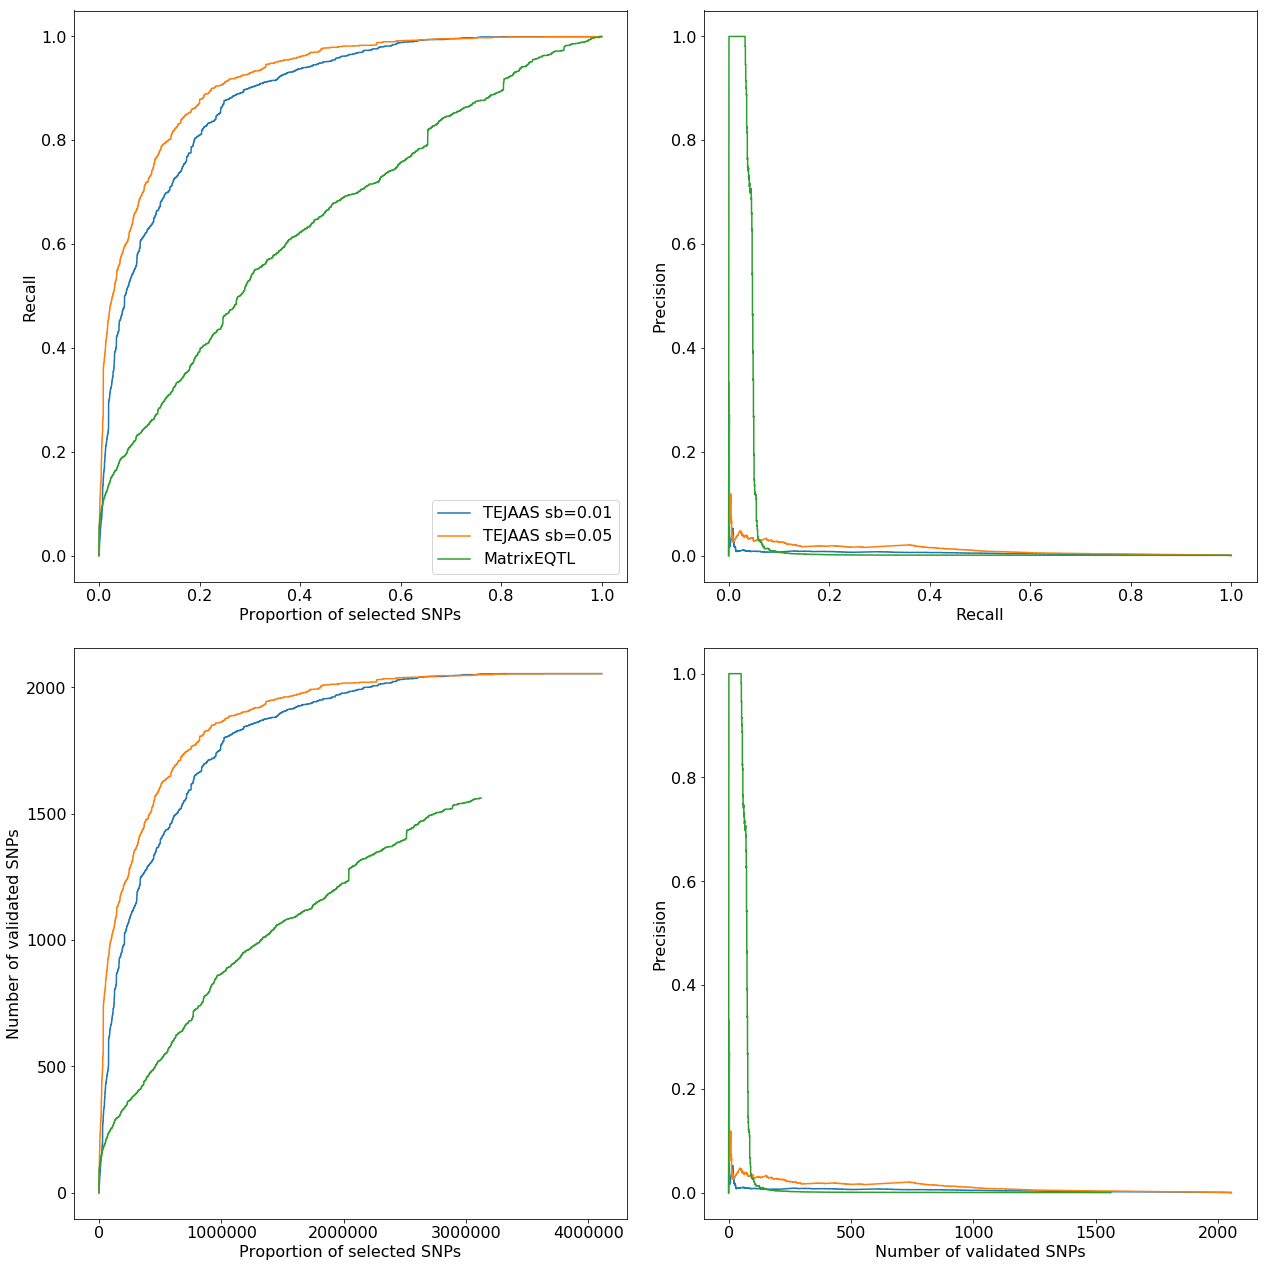

In [162]:
from utils import utils

t1="gtex-ov"
t2="gtex-ut"


SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plot_methods = dict()
plot_empirical_percents = [0.05]
for ep in plot_empirical_percents:
    for method in methods:
        if method == "tejaas_perm":
            for sb in sbs:
                method_sb = method + "_" + sb
                mkey = method_sb + "_ep" + str(ep)
                roc_dir = os.path.join(data_dir, method_sb, str(ep))
                roc_file = os.path.join(roc_dir, t1+"_"+t2+"."+method_sb+".roc.txt")
                print(roc_file)
                plot_methods[mkey] = roc_file
        else:
            mkey = method + "_ep" + str(ep)
            roc_dir = os.path.join(data_dir, method, str(ep))
            roc_file = os.path.join(roc_dir, t1+"_"+t2+"."+method+".roc.txt")
            print(roc_file)
            plot_methods[mkey] = roc_file

            
fig = plt.figure(figsize = (18, 18))
# ax1 = fig.add_subplot(111)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# plot_methods = ['tejaas_maf', 'tejaas_perm', 'cpma', 'matrixeqtl', 'matrixeqtl_fdr',
#                 'tejaas_rand_maf', 'tejaas_rand_perm', 'cpma_rand', 'matrixeqtl_rand']
# plot_methods = ['tejaas_perm']

for key in plot_methods:
    nsel, tpr, ppv, valids = utils.read_rocfile(plot_methods[key])
    scaled_nsel = nsel / max(nsel)
    if key.startswith("tejaas_perm_0.01"):
        llabel = "TEJAAS sb=0.01"
    if key.startswith("tejaas_perm_0.05"):
        llabel = "TEJAAS sb=0.05"
    if key.startswith("matrixeqtl"):
        llabel = "MatrixEQTL"
    ax1.plot(scaled_nsel, tpr, label = llabel)
    ax2.plot(tpr, ppv, label = key)
    ax3.plot(nsel, valids, label = key)
    ax4.plot(valids, ppv, label = key)
    
mlabel = r'Proportion of selected SNPs'
ax1.set_xlabel(mlabel)
ax3.set_xlabel(mlabel)
mlabel = r'Recall'
ax1.set_ylabel(mlabel)
ax2.set_xlabel(mlabel)
mlabel = r'Number of validated SNPs'
ax4.set_xlabel(mlabel)
ax3.set_ylabel(mlabel)
mlabel = r'Precision'
ax2.set_ylabel(mlabel)
ax4.set_ylabel(mlabel)

#ax2.set_xlim([0, 1000])
#ax1.set_xlim([0, 10000])
#ax1.set_ylim([0, 5000])
ax1.legend(loc='lower right', fontsize=16)
plt.tight_layout()
# plt.savefig(outfile, bbox_inches='tight')
plt.show()